In [ ]:
from google.colab import  drive
drive.mount('/content/drive')

In [ ]:
#!git clone https://github.com/congnghia0609/ntc-scv.git

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/Token_VietNam'

In [ ]:
#!unzip /content/ntc-scv/data/data_test.zip

In [ ]:
#!unzip /content/ntc-scv/data/data_train.zip

In [ ]:
#!pip install tf-nightly

In [ ]:
import pandas as pd
import os
#folder = 'data_train'
#labels = {'pos': 1, 'neg': 0}
#df = pd.DataFrame()
#for f in ('test', 'train'):    
#    for l in ('pos', 'neg'):
#        path = os.path.join(folder, f, l)
#        for file in os.listdir (path) :
#            with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
#                txt = infile.read()
#            df = df.append([[txt, labels[l]]],ignore_index=True)
#df.columns = ['review', 'sentiment']

In [ ]:
#  folder = 'data_test'
#  labels = {'pos': 1, 'neg': 0}
#  df_test = pd.DataFrame()
#  for f in ('test', '_'): 
#     if f is '_':break  
#     for l in ('pos', 'neg'):
#         path = os.path.join(folder, f, l)
#         for file in os.listdir (path) :
#             with open(os.path.join(path, file),'r', encoding='utf-8') as infile:
#                 txt = infile.read()
#             df_test = df_test.append([[txt, labels[l]]],ignore_index=True)
    

In [ ]:
 #df_test.to_csv('Foody_test.csv')

In [ ]:
# df.to_csv('Foody.csv')

In [ ]:
import numpy as np

In [ ]:
folder_csv ='/content/drive/My Drive/Colab Notebooks/Token_VietNam/Foody.csv'
with open(folder_csv,'r')as f:
  df = pd.read_csv(f)

In [ ]:
folder_csv ='/content/drive/My Drive/Colab Notebooks/Token_VietNam/Foody_test.csv'
with open(folder_csv,'r')as f:
  df_test = pd.read_csv(f)

In [ ]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Món ăn khá ngon . nhà_hàng liên_tục thêm món m...,1
1,1,Đồ_ăn nướng ngon ! Không_gian dễ_chịu hợp cho ...,1
2,2,Buổi_trưa mình hay đi ăn với đồng_nghiệp ở đây...,1
3,3,em ăn từ những ngày bánh chưa bán cho tới h : ...,1
4,4,Fan ruô ̣ t cu ̉ a Dounut ^ ^ thi ́ ch chô ̃ n...,1


In [ ]:
df = df.sample(frac=1)
df_test = df_test.sample(frac=1)

In [ ]:
df

,Unnamed: 0,review,sentiment
20640,20640,"Rạp mình ghét nhất của Galaxy chính là đây , c...",0
3356,3356,Xung_quanh là công_viên nên lúc_nào khu_vực nà...,1
4886,4886,1 cơ_duyên nho_nhỏ đưa mình đến với quán khi m...,1
14839,14839,Theo mình việc khách tới ngồi đâu cho thoải_má...,0
12298,12298,thấy hình đẹp nên không quãng ngại đường xa đế...,0
...,...,...,...
6447,6447,"Quán nhậu với các món nướng giá_cả bình_dân , ...",0
7106,7106,2 cơ_sở của waffles house thì cả 2 cơ_sở đều r...,0
7128,7128,Bánh_mì chảo thì_có mỗi trứng pate chiên ko có...,0
18829,18829,"Trong quán bày trí rất teen , hợp cho các bạn ...",0


In [ ]:
dataRaw = df[['review','sentiment']]
train_sentence =dataRaw['review'].to_numpy()
train_labels = dataRaw['sentiment'].to_numpy()

In [ ]:
valid_sentence = df_test['0'].to_numpy()
valid_lables = df_test['1'].to_numpy()

In [ ]:
print('len train sentence',len(train_sentence))
print('len train labels', len(train_labels))

print('len valid sentence',len(valid_sentence))
print('len valid labels',len(valid_sentiment))

len train sentence 21084
len train labels 21084
len valid sentence 10000
len valid labels 10000


In [ ]:
!pip3 install vncorenlp

     |████████████████████████████████| 2.7MB 8.9MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-cp36-none-any.whl size=2645935 sha256=8a77445e5824122c40176c6e0f49c385b8d1386dbfbf0c70296f1c7069d2fff4
  Stored in directory: /root/.cache/pip/wheels/09/54/8b/043667de6091d06a381d7745f44174504a9a4a56ecc9380c54
Successfully built vncorenlp


In [ ]:
from vncorenlp import VnCoreNLP

In [ ]:
#!wget 'https://github.com/vncorenlp/VnCoreNLP/archive/v1.1.1.zip' -O ./models.$$ && unzip -o ./models.$$ && rm -r ./models.$$

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Token_VietNam/VnCoreNLP-1.1.1/VnCoreNLP-1.1.1.jar'
tokenV = VnCoreNLP(path,port=9000, annotators='wseg',quiet=False)

In [ ]:
Token = str(train_sentence)

In [ ]:
len(Token)

2920

In [ ]:
Token

'[\'Rạp mình ghét nhất của Galaxy chính là đây , chỗ giữ xe thì nhỏ_xíu và lúc_nào cũng đông_nghẹt . Có lần vì chật quá nên khi chạy xe vào lỡ quẹt trúng chiếc Ab làm rớt cái nắp pô xe ... ... . . nên phải đền 90k cho chủ , nhưng đó là mình sai ko nói làm_gì nhưng bực ở đây là mấy thằng bảo_vệ nó làm như mình ăn_cắp xe người_ta bỏ trốn vậy ... ...\\nCả đám la um_sùm lên rồi một_hai đòi giữ_mình lại ko cho lên coi phim trong khi mình đã nói là " anh cầm tạm cái cmnd và sđt của em rồi lỡ người_ta ra hỏi thì chỉ cần đt cái là em xuống " nhưng vẫn ko chịu : nói một là để 150 lại rồi đi hai là ở lại chứ không mắc_công mình trốn mất . Điên hết cả người đành để nhỏ em đứng đó làm_tin rồi ôm cái pô xe qua tiệm sửa xe gần đó hỏi giá thì nó nói là pô xe có hai loại giá , một 45 và một 90 ( kiêm luôn công lắp )\\nKhi mình quay lại thì thấy chủ xe xuống nên mình chạy lại trình_bày và đề_nghị trả 90 cho họ , trong lúc mình nói thì mấy tên đó lại nhảy zô họng lải_nhải : " Pô xe giờ mắc lắm lấy 100 t

In [ ]:
corpus = tokenV.tokenize(Token)

In [ ]:
corpus

[['[',
  '"',
  'Món',
  'ăn',
  'khá',
  'ngon',
  '.',
  'nhà',
  '_',
  'hàng',
  'liên',
  '_',
  'tục',
  'thêm',
  'món',
  'mới',
  'nên',
  'lần',
  'nào',
  'đến',
  'cũng',
  'đc',
  'thay',
  '_',
  'đổi',
  'khẩu',
  '_',
  'vị',
  '.',
  'thích',
  'thật',
  '\\',
  'nLẩu',
  'ở',
  'đây',
  'cũng',
  'nhiều',
  'thật',
  ',',
  '2',
  'người',
  'ăn',
  'mà',
  'vẫn',
  'no',
  'căng',
  '.',
  'vị',
  'cay',
  '_',
  'cay',
  'nồng',
  'nồng',
  'ngon',
  'thật',
  '.'],
 ['\\', 'nCòn', 'nhiều', 'món', 'chưa', 'được', 'ăn', 'nữa', '.'],
 ['\\',
  'nAi',
  'từng',
  'ăn',
  'qua',
  'món',
  'Hàn',
  'cũng',
  '_',
  'nên',
  'đến',
  'đây',
  'ăn',
  'thử',
  'đi',
  '.',
  'mình',
  'cũng',
  'ăn',
  'ớ',
  'nhiều',
  'nơi',
  'mà',
  'thấy',
  'ở',
  'đây',
  'là',
  'đặc',
  '\\',
  'xa',
  '0',
  'biệt',
  'và',
  'tạo',
  'án',
  'tượng',
  'tốt',
  'với',
  'mình',
  'nhất',
  '.'],
 ['\\',
  'nNhân',
  '_',
  'viên',
  'cũng',
  'tuyệt',
  '_',
  'vời',
  'và',
  

In [ ]:
len(corpus)

31

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=1000,filters='"#$%&()*+,-:;<=>[]`{|}~\n',oov_token="<OOV>")

In [ ]:
tokenizer.fit_on_texts(corpus)

In [ ]:
tokenizer.word_index

{'!': 77,
 '"': 41,
 "'": 9,
 '(': 65,
 ')': 66,
 '+': 248,
 ',': 5,
 '-': 49,
 '.': 3,
 '...': 16,
 '1': 118,
 '100': 197,
 '10k': 238,
 '150': 100,
 '15p': 215,
 '2': 217,
 '45': 184,
 '5k': 240,
 '90': 64,
 '90k': 155,
 ':': 98,
 '<': 210,
 '<OOV>': 1,
 '=': 247,
 '>': 209,
 '[': 136,
 '\\': 7,
 ']': 351,
 '_': 2,
 'ab': 151,
 'anh': 170,
 'biên': 316,
 'biểu': 260,
 'biệt': 278,
 'bày': 107,
 'bánh': 123,
 'bây': 270,
 'bên': 235,
 'bò': 296,
 'bạn': 72,
 'bảo': 158,
 'bị': 237,
 'bỏ': 162,
 'bộ': 204,
 'bực': 85,
 'chiên': 288,
 'chiếc': 150,
 'cho': 17,
 'chung': 227,
 'chán': 297,
 'chính': 141,
 'chương': 223,
 'chạy': 81,
 'chả': 112,
 'chảo': 285,
 'chận': 205,
 'chật': 145,
 'chế': 272,
 'chỉ': 93,
 'chịu': 97,
 'chỗ': 142,
 'chờ': 230,
 'chụp': 71,
 'chủ': 53,
 'chứ': 101,
 'cmnd': 172,
 'coi': 56,
 'cuối': 211,
 'các': 34,
 'cách': 331,
 'cái': 38,
 'còn': 47,
 'có': 13,
 'công': 60,
 'cùng': 212,
 'cũng': 25,
 'cơ': 119,
 'cưới': 258,
 'cả': 62,
 'cảm': 283,
 'cầm': 91,
 

In [ ]:
len(tokenizer.word_index)

351

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentence)
test_sequences = tokenizer.texts_to_sequences(valid_sentence)

max_length = 240 
padded_train_sequences= pad_sequences(train_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

padded_test_sequences= pad_sequences(test_sequences,
                                      maxlen= max_length,
                                      padding='post',
                                      truncating='post')

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import Regularizer
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers  import GlobalAveragePooling1D
from tensorflow.keras.layers  import Dense
from tensorflow.keras.layers import Conv1D,Dropout 
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM

In [ ]:
model = Sequential()
model.add(Embedding(1000,64)) 
model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 113,409
Trainable params: 113,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 50



model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='acc')


history = model.fit(padded_train_sequences,train_labels, 
          epochs=num_epochs,
          validation_data=(padded_test_sequences,valid_lables))

Epoch 1/50
659/659 [==============================] - 5s 7ms/step - loss: 0.5380 - acc: 0.7980 - val_loss: 0.6248 - val_acc: 0.6737
Epoch 2/50
659/659 [==============================] - 5s 7ms/step - loss: 0.3866 - acc: 0.8309 - val_loss: 0.5349 - val_acc: 0.7296
Epoch 3/50
659/659 [==============================] - 5s 7ms/step - loss: 0.3779 - acc: 0.8333 - val_loss: 0.5659 - val_acc: 0.7113
Epoch 4/50
659/659 [==============================] - 4s 6ms/step - loss: 0.3712 - acc: 0.8376 - val_loss: 0.5470 - val_acc: 0.7172
Epoch 5/50
659/659 [==============================] - 4s 7ms/step - loss: 0.3671 - acc: 0.8367 - val_loss: 0.5877 - val_acc: 0.7089
Epoch 6/50
659/659 [==============================] - 4s 7ms/step - loss: 0.3639 - acc: 0.8394 - val_loss: 0.5263 - val_acc: 0.7332
Epoch 7/50
659/659 [==============================] - 4s 7ms/step - loss: 0.3635 - acc: 0.8384 - val_loss: 0.5268 - val_acc: 0.7397
Epoch 8/50
659/659 [==============================] - 4s 6ms/step - loss: 0.

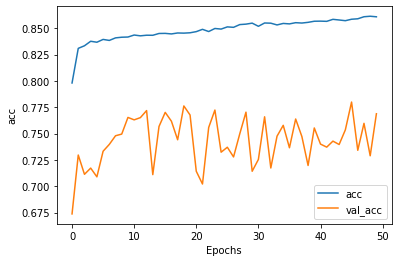

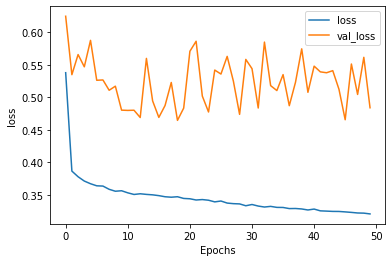

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, setting):
  plt.plot(history.history[setting])
  plt.plot(history.history['val_'+setting])
  plt.xlabel("Epochs")
  plt.ylabel(setting)
  plt.legend([setting, 'val_'+setting])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

Model2


In [ ]:
model2 = Sequential()
model2.add(Embedding(1000,64))
model2.add(Bidirectional(LSTM(120,return_sequences=True)))
model2.add(Bidirectional(LSTM(units=64)))

model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model2.add(Dense(1,activation="sigmoid"))

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 240)         177600    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               156160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 401,921
Trainable params: 401,921
Non-trainable params: 0
________________________________________________

In [ ]:
expected_acc = 0.94

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=()):
    if(logs.get('val_acc') > expected_acc):
      self.model.stop_training =True

callbacks = MyCallback()

In [ ]:
num_epochs = 100



model2.compile(loss = 'binary_crossentropy',optimizer='adam',metrics='acc')


history2 = model2.fit(padded_train_sequences,train_labels, 
          epochs=num_epochs,
          validation_data=(padded_test_sequences,valid_lables),
          callbacks=[callbacks])

Epoch 1/100
659/659 [==============================] - 33s 50ms/step - loss: 0.5646 - acc: 0.7737 - val_loss: 0.8141 - val_acc: 0.5000
Epoch 2/100
659/659 [==============================] - 32s 48ms/step - loss: 0.5337 - acc: 0.7629 - val_loss: 0.7883 - val_acc: 0.5000
Epoch 3/100
659/659 [==============================] - 32s 48ms/step - loss: 0.5026 - acc: 0.7629 - val_loss: 0.8806 - val_acc: 0.5000
Epoch 4/100
659/659 [==============================] - 32s 48ms/step - loss: 0.4480 - acc: 0.7629 - val_loss: 0.8371 - val_acc: 0.5000
Epoch 5/100
659/659 [==============================] - 32s 48ms/step - loss: 0.4711 - acc: 0.7743 - val_loss: 0.5833 - val_acc: 0.7265
Epoch 6/100
659/659 [==============================] - 32s 49ms/step - loss: 0.3709 - acc: 0.8345 - val_loss: 0.5851 - val_acc: 0.7772
Epoch 7/100
659/659 [==============================] - 32s 48ms/step - loss: 0.3528 - acc: 0.8504 - val_loss: 0.5240 - val_acc: 0.7942
Epoch 8/100
659/659 [==============================] - 

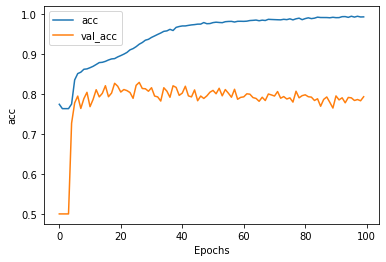

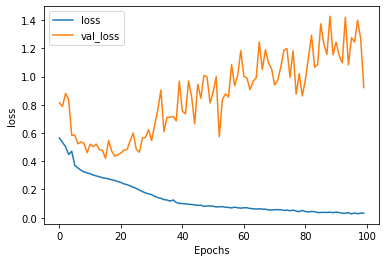

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, setting):
  plt.plot(history.history[setting])
  plt.plot(history.history['val_'+setting])
  plt.xlabel("Epochs")
  plt.ylabel(setting)
  plt.legend([setting, 'val_'+setting])
  plt.show()
  
plot_graphs(history2, "acc")
plot_graphs(history2, "loss")